Flux and transport into and out of shelf box along shelf in 3DDIFF experiments
==

This notebook explores the similarities and differences between the 3 tracer transports in case 3DDIFF as well as canyon and no canyon cases. It looks at the flux normal to a shelf wall<sup>1</sup>. Flux is understood here as tracer transport (concentration * vol/s). This gives the following units:

$[Flux] = [C]m^3s^{-1} = (mol/l) (m^3/s) = (mol/s)*1000 $

TracFlux = AdvFlux + DiffFlux 

<sup>1</sup> Wall that goes from shelf-break depth to surface and all along the shelf break of a flat shelf. This needs to take into account the vertical component of flux onto the shelf when there is a canyon.

The base case to compare the effect of enhanced diffusivity is a run with GMREDI (because 3DDIFF exps use GMREDI too) but constant vertical diffusivity (CNTDIFF run03). The vertical diff for tracer 1 is $10^{-5}$ $m^2s^{-1}$ and $10^{-3}$ $m^2s^{-1}$ for tracer 2. An associated no-canyon case allows to isolate the effect of the canyon (CNTDIFF run07).  

3DDIFF runs include the following cases:

| Run   |   $k_{v_{in}}$ ($m^2s^{-1}$)   |  $k_{v_{out}}$ ($m^2s^{-1}$)  | Diffusivity file from  |
|:-----:|:------------------------------:|:-----------------------------:|:-----------------------|
|  04   | $10^{-3}$                      | $10^{-7}$                     |  Quad bathy            |
|  05   | $10^{-4}$                      | $10^{-7}$                     |  Quad bathy            |
|  06   | $10^{-3}$                      | $10^{-5}$                     |  Quad bathy            |
|  07   | $10^{-4}$                      | $10^{-5}$                     |  Quad bathy            |

| Run 09 Tr  | $k_{v}$      ($m^2s^{-1}$)   | Average $k_v$ of run  | 
|:----------:|:-------------------------:|:---------------------:|
|  1         |$3.8\times10^{-5}$        |      run06              |  
|  2         |$2.8\times10^{-5}$        |      run04              |  
|  3         |$1.3\times10^{-5}$        |      run07              |  



In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [2]:
lib_path = os.path.abspath('/ocean/kramosmu/Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import ShelfBreakTools_MITgcm as sb


In [11]:
def vTracBoxAlong(Mask,V,zlim=30, ylim=230):
    '''MaskC : mask corresponding to '''
    mask_expand2 = np.expand_dims(Mask[:zlim,ylim,:],0)
    mask_expand2 = mask_expand2 + np.zeros(V[:,:zlim,ylim,:].shape)

    VTRACbox= np.sum(np.ma.masked_array(V[:,:zlim,ylim,:],mask = mask_expand2),axis=1)
    return(VTRACbox)



In [4]:
#Base case, iso =1 , No 3d diff.
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj
CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

FluxTR01 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc'
FluxOut1 = Dataset(FluxTR01)

FluxTR03 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR03Glob.nc'
FluxOut3 = Dataset(FluxTR03)

CanyonGridNoC='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
CanyonGridOutNoC = Dataset(CanyonGridNoC)

CanyonStateNoC='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/stateGlob.nc'

FluxTR01NoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/FluxTR01Glob.nc'
FluxTR03NoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/FluxTR03Glob.nc'

In [5]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(CanyonGridNoC, 'HFacC')
MaskCNoC = rout.getMask(CanyonGridNoC, 'HFacC')

dxF = rout.getField(CanyonGrid, 'dxF')
drF = CanyonGridOut.variables['drF']

In [6]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [7]:
VTR = rout.getField(FluxTR01,'ADVyTr01') # 
UTR = rout.getField(FluxTR01,'ADVxTr01') # 
UTRAC,VTRAC = rout.unstagger(UTR, VTR)

VTR = rout.getField(FluxTR01NoC,'ADVyTr01') # 
UTR = rout.getField(FluxTR01NoC,'ADVxTr01') # 
UTRACNoC,VTRACNoC = rout.unstagger(UTR, VTR)

WTRAC = rout.getField(FluxTR01,'ADVrTr01') # 
WTRACNoC = rout.getField(FluxTR01NoC,'ADVrTr01') # 


In [8]:
# TRACER 1

FluxTR013d4 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/FluxTR01Glob.nc' 
FluxOut13d4 = Dataset(FluxTR013d4)

FluxTR013d5 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/FluxTR01Glob.nc' 
FluxOut13d5 = Dataset(FluxTR013d5)

FluxTR013d6 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/FluxTR01Glob.nc' 
FluxOut13d6 = Dataset(FluxTR013d6)

#FluxTR013d7 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/FluxTR01Glob.nc' rerun
#FluxOut13d7 = Dataset(FluxTR013d7)


FluxTR01CNT09 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09/FluxTR01Glob.nc'
FluxOut1CNT09 = Dataset(FluxTR01CNT09)

FluxTR02CNT09 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09/FluxTR02Glob.nc'
FluxOut2CNT09 = Dataset(FluxTR02CNT09)

FluxTR03CNT09 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09/FluxTR03Glob.nc'
FluxOut3CNT09 = Dataset(FluxTR03CNT09)


In [9]:
VTR = rout.getField(FluxTR013d4,'ADVyTr01') # 
UTR = rout.getField(FluxTR013d4,'ADVxTr01') # 

UTRAC04,VTRAC04 = rout.unstagger(UTR, VTR)
WTRAC04 = rout.getField(FluxTR013d4,'ADVrTr01') # 

VTR = rout.getField(FluxTR013d5,'ADVyTr01') # 
UTR = rout.getField(FluxTR013d5,'ADVxTr01') # 

UTRAC05,VTRAC05 = rout.unstagger(UTR, VTR)
WTRAC05 = rout.getField(FluxTR013d5,'ADVrTr01') # 

VTR = rout.getField(FluxTR013d6,'ADVyTr01') # 
UTR = rout.getField(FluxTR013d6,'ADVxTr01') # 

UTRAC06,VTRAC06 = rout.unstagger(UTR, VTR)
WTRAC06 = rout.getField(FluxTR013d6,'ADVrTr01') # 

#VTR = rout.getField(FluxTR013d7,'ADVyTr01') # 
#UTR = rout.getField(FluxTR013d7,'ADVxTr01') # 

#UTRAC07,VTRAC07 = rout.unstagger(UTR, VTR)
#WTRAC07 = rout.getField(FluxTR013d7,'ADVrTr01') # 

VTR = rout.getField(FluxTR01CNT09,'ADVyTr01') # 
UTR = rout.getField(FluxTR01CNT09,'ADVxTr01') # 

UTRACTr1,VTRACTr1 = rout.unstagger(UTR, VTR)
WTRACTr1 = rout.getField(FluxTR01CNT09,'ADVrTr01') # 

VTR = rout.getField(FluxTR02CNT09,'ADVyTr02') # 
UTR = rout.getField(FluxTR02CNT09,'ADVxTr02') # 

UTRACTr2,VTRACTr2 = rout.unstagger(UTR, VTR)
WTRACTr2 = rout.getField(FluxTR02CNT09,'ADVrTr02') # 

VTR = rout.getField(FluxTR03CNT09,'ADVyTr03') # 
UTR = rout.getField(FluxTR03CNT09,'ADVxTr03') # 

UTRACTr3,VTRACTr3 = rout.unstagger(UTR, VTR)
WTRACTr3 = rout.getField(FluxTR03CNT09,'ADVrTr03') # 



In [12]:
CSbase = vTracBoxAlong(MaskC,VTRAC,zlim=30,ylim=230)
CSbaseNoC = vTracBoxAlong(MaskCNoC,VTRACNoC,zlim=30,ylim=230)
CS04 = vTracBoxAlong(MaskC,VTRAC04,zlim=30,ylim=230)
CS05 = vTracBoxAlong(MaskC,VTRAC05,zlim=30,ylim=230)
CS06 = vTracBoxAlong(MaskC,VTRAC06,zlim=30,ylim=230)
#CS07 = vTracBoxAlong(MaskC,VTRAC07,zlim=30,ylim=230)
CSTr1 = vTracBoxAlong(MaskC,VTRACTr1,zlim=30,ylim=230)
CSTr2 = vTracBoxAlong(MaskC,VTRACTr2,zlim=30,ylim=230)
CSTr3 = vTracBoxAlong(MaskC,VTRACTr3,zlim=30,ylim=230)
   

1
3
5
7
9
11
13
15


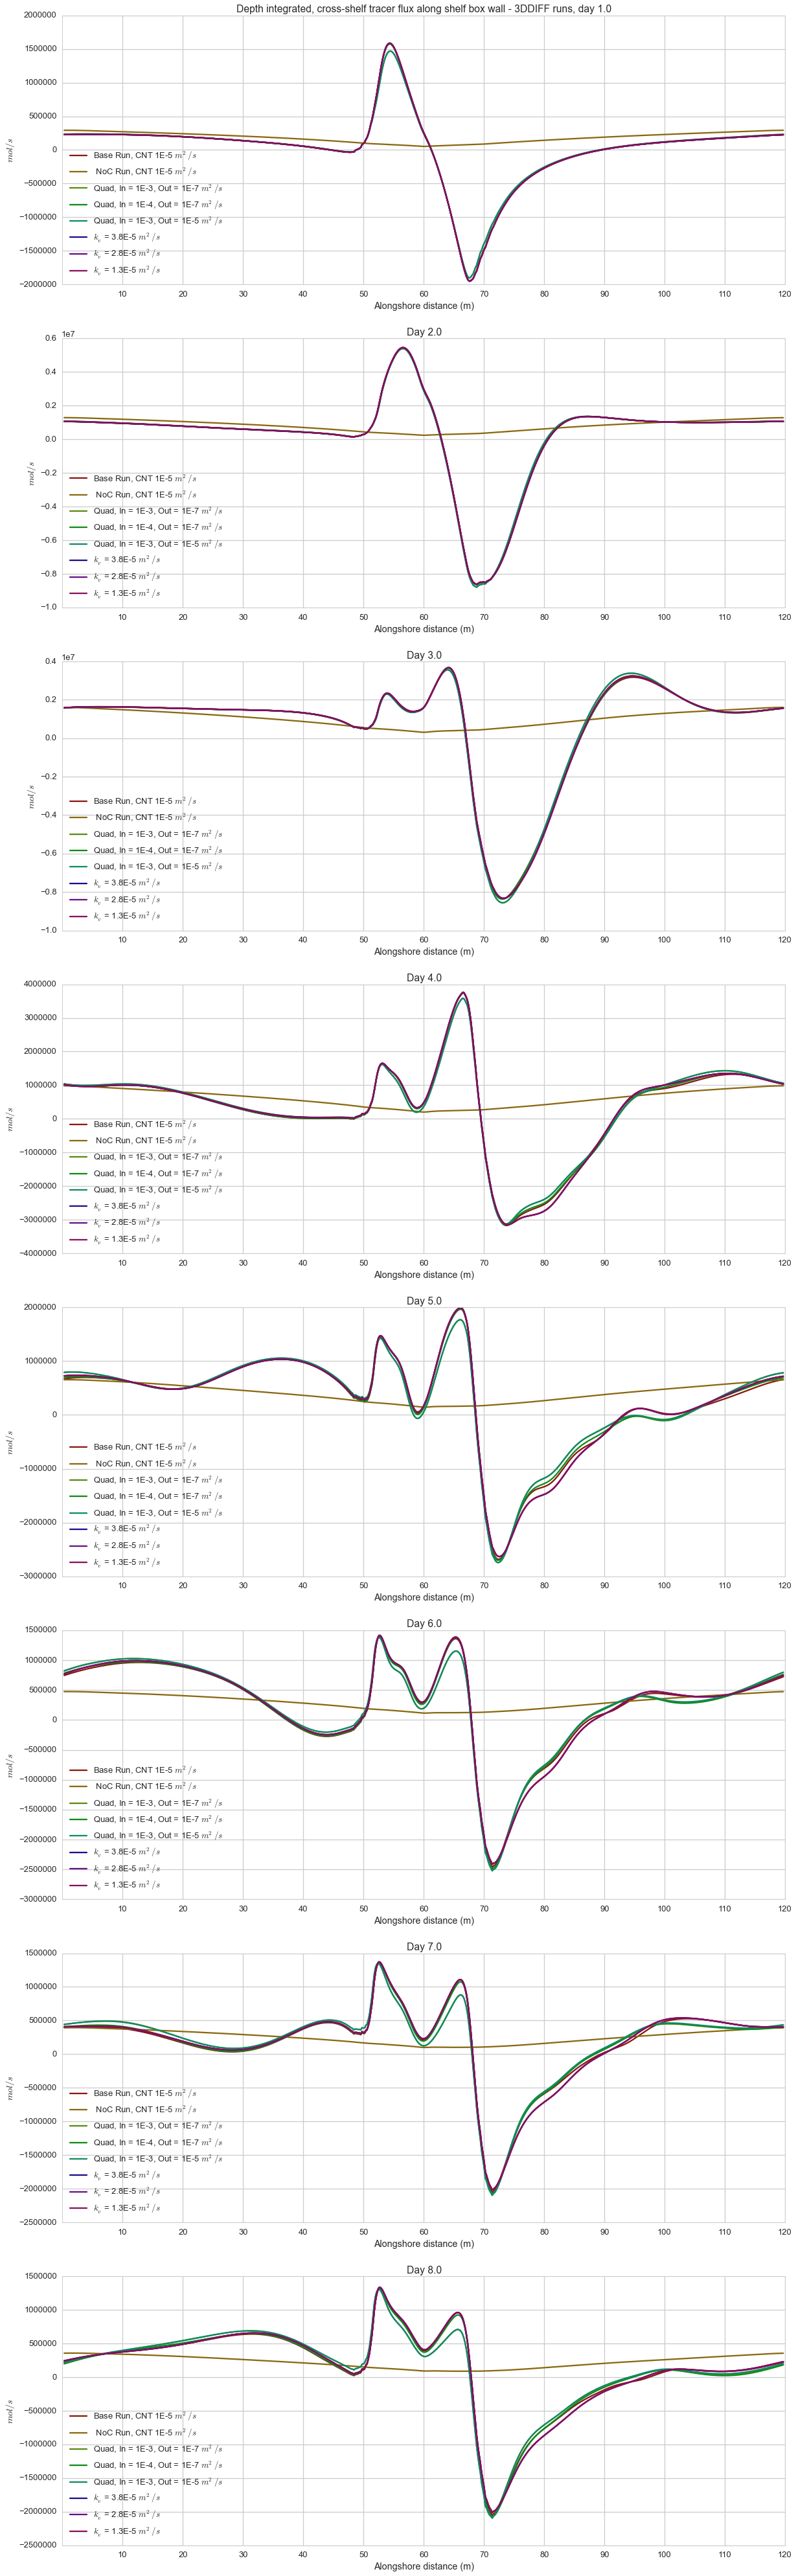

In [37]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1)

figSize=(20,70)

unitsTr = '$mol/s$'

fig,((ax1),(ax2),(ax3),(ax4),(ax5),(ax6),(ax7),(ax8))  = plt.subplots(8, 1,figsize=figSize)

axnum = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
tind= [1,3,5,7,9,11,13,15]


colors=sns.hls_palette(9, l=.3, s=.8)
for ii in zip(axnum,tind):
    ax = ii[0]
    print(ii[1])
    ax.plot(xc[1,:],CSbase[ii[1],:]*1000.0,'-',color=colors[0],label = 'Base Run, CNT 1E-5 $m^2/s$ ')
    ax.plot(xc[1,:],CSbaseNoC[ii[1],:]*1000.0,'-',color=colors[1],label = ' NoC Run, CNT 1E-5 $m^2/s$ ')
    ax.plot(xc[1,:],CS04[ii[1],:]*1000.0,'-',color=colors[2],label = 'Quad, In = 1E-3, Out = 1E-7 $m^2/s$')
    ax.plot(xc[1,:],CS05[ii[1],:]*1000.0,'-',color=colors[3],label = 'Quad, In = 1E-4, Out = 1E-7 $m^2/s$')
    ax.plot(xc[1,:],CS06[ii[1],:]*1000.0,'-',color=colors[4],label = 'Quad, In = 1E-3, Out = 1E-5 $m^2/s$')
    #ax.plot(xc[1,:],CS07[ii[1],:]*1000.0,'-',color=colors[5],label = 'Quad, In = 1E-4, Out = 1E-5 $m^2/s$')
    ax.plot(xc[1,:],CSTr1[ii[1],:]*1000.0,'-',color=colors[6],label = '$k_v$ = 3.8E-5 $m^2/s$')
    ax.plot(xc[1,:],CSTr2[ii[1],:]*1000.0,'-',color=colors[7],label = '$k_v$ = 2.8E-5 $m^2/s$')
    ax.plot(xc[1,:],CSTr3[ii[1],:]*1000.0,'-',color=colors[8],label = '$k_v$ = 1.3E-5 $m^2/s$')
       
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,3,4,5,6,7)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
                  [label for i,label in enumerate(labels) if i in display],loc=0)
   
    ax.set_xticks([10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000])
    ax.set_xticklabels(['10','20','30','40', '50', '60', '70', '80','90','100','110','120'])
    
    ax.set_xlabel('Alongshore distance (m)')
    ax.set_ylabel(unitsTr)
        
    if ii[1] == 1:
        ax.set_title('Depth integrated, cross-shelf tracer flux along shelf box wall - 3DDIFF runs, day %.1f' %(ii[1]))
    else:
        ax.set_title('Day %.1f' %(ii[1]/2.0+0.5))
        
        
    

1
3
5
7
9
11
13
15


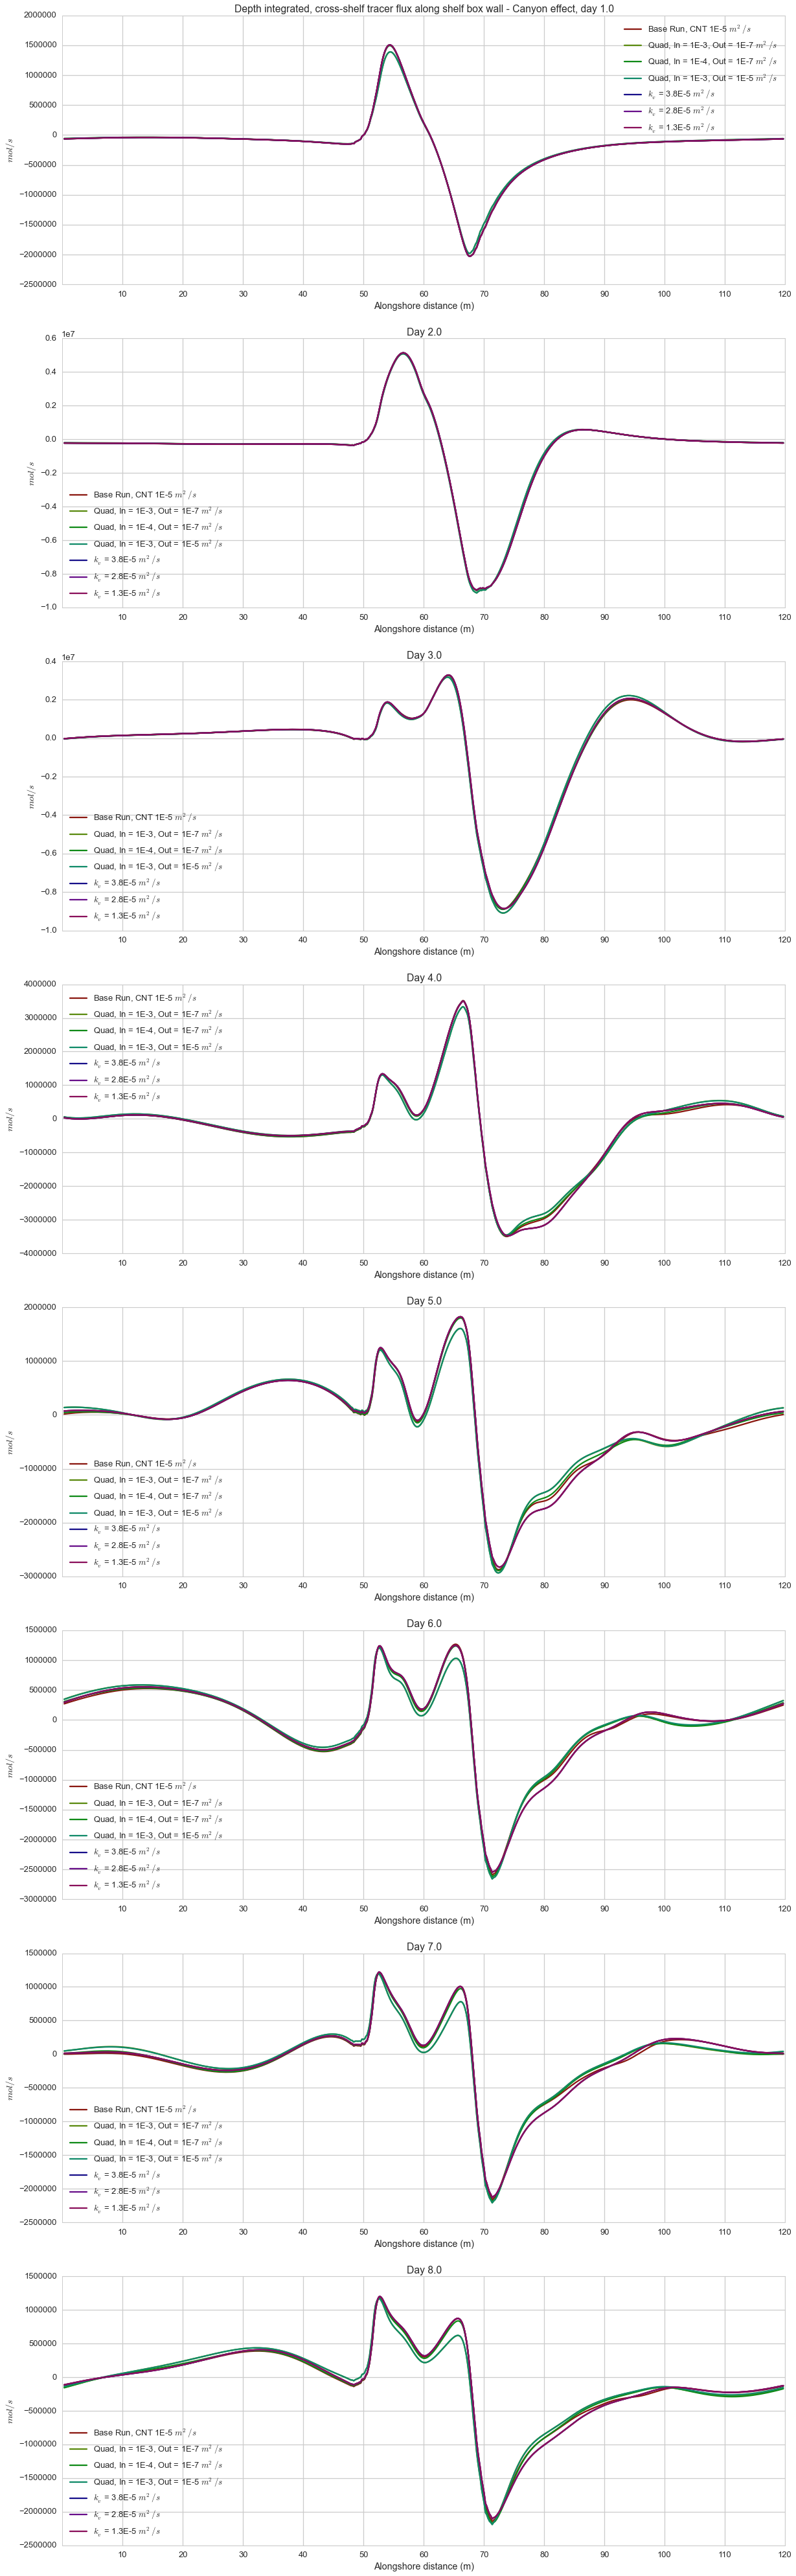

In [40]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1)

figSize=(20,70)

unitsTr = '$mol/s$'

fig,((ax1),(ax2),(ax3),(ax4),(ax5),(ax6),(ax7),(ax8))  = plt.subplots(8, 1,figsize=figSize)

axnum = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
tind= [1,3,5,7,9,11,13,15]


colors=sns.hls_palette(9, l=.3, s=.8)
for ii in zip(axnum,tind):
    ax = ii[0]
    print(ii[1])
    ax.plot(xc[1,:],CSbase[ii[1],:]*1000.0-CSbaseNoC[ii[1],:]*1000.0,'-',color=colors[0],label = 'Base Run, CNT 1E-5 $m^2/s$ ')
    ax.plot(xc[1,:],CS04[ii[1],:]*1000.0-CSbaseNoC[ii[1],:]*1000.0,'-',color=colors[2],label = 'Quad, In = 1E-3, Out = 1E-7 $m^2/s$')
    ax.plot(xc[1,:],CS05[ii[1],:]*1000.0-CSbaseNoC[ii[1],:]*1000.0,'-',color=colors[3],label = 'Quad, In = 1E-4, Out = 1E-7 $m^2/s$')
    ax.plot(xc[1,:],CS06[ii[1],:]*1000.0-CSbaseNoC[ii[1],:]*1000.0,'-',color=colors[4],label = 'Quad, In = 1E-3, Out = 1E-5 $m^2/s$')
    #ax.plot(xc[1,:],CS07[ii[1],:]*1000.0-CSbaseNoC[ii[1],:]*1000.0,'-',color=colors[5],label = 'Quad, In = 1E-4, Out = 1E-5 $m^2/s$')
    ax.plot(xc[1,:],CSTr1[ii[1],:]*1000.0-CSbaseNoC[ii[1],:]*1000.0,'-',color=colors[6],label = '$k_v$ = 3.8E-5 $m^2/s$')
    ax.plot(xc[1,:],CSTr2[ii[1],:]*1000.0-CSbaseNoC[ii[1],:]*1000.0,'-',color=colors[7],label = '$k_v$ = 2.8E-5 $m^2/s$')
    ax.plot(xc[1,:],CSTr3[ii[1],:]*1000.0-CSbaseNoC[ii[1],:]*1000.0,'-',color=colors[8],label = '$k_v$ = 1.3E-5 $m^2/s$')
       
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,3,4,5,6,7)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
                  [label for i,label in enumerate(labels) if i in display],loc=0)
   
    ax.set_xticks([10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000])
    ax.set_xticklabels(['10','20','30','40', '50', '60', '70', '80','90','100','110','120'])
    
    ax.set_xlabel('Alongshore distance (m)')
    ax.set_ylabel(unitsTr)
        
    if ii[1] == 1:
        ax.set_title('Depth integrated, cross-shelf tracer flux along shelf box wall - Canyon effect, day %.1f' %(ii[1]))
    else:
        ax.set_title('Day %.1f' %(ii[1]/2.0+0.5))
        
        
    